In [101]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt
import cellpylib as cpl
from modules import triangulize_evolution
from modules import find_elem_jams
import scipy


In [102]:
p = 0.50
L = 1000
T = int(L / 2)

In [103]:
def calculate_jam_size(cellular_automaton_triangle):
    jam_size = {}
    automaton_shape = cellular_automaton_triangle.shape
    
    for row in range(automaton_shape[0]-1):                             #For every step in time
        for column in range(automaton_shape[1]):                        #For every step in space
            state = cellular_automaton_triangle[row, column]
            new_state = cellular_automaton_triangle[row+1, column]

            original_jam_column = column + row

            if state == 1 and new_state == 1:                           #If the car is stationairy add one to the "jam number", which is the original cell in which the jam originated
                if original_jam_column not in jam_size:
                    jam_size[original_jam_column] = 1
                else:
                    jam_size[original_jam_column] += 1

    return jam_size

def remove_short_jams(jam_sizes):
    jam_sizes_copy = jam_sizes.copy()
    previous_jam_size = 0
    removed_jams = []
    for key in jam_sizes_copy.keys():
        if jam_sizes_copy[key] <= previous_jam_size:                    #Check if the jam size is smaller or equal compared to previous jams, if so it will be removed
            removed_jams.append(key)
        else:
            previous_jam_size = jam_sizes_copy[key]

    for jam in removed_jams:
        jam_sizes_copy.pop(jam)

    return jam_sizes_copy, removed_jams

def merge_jams(jam_sizes):
    lists = sorted(jam_sizes.items())
    jam, size = zip(*lists) 
    jam = np.array(jam)
    size = np.array(size)

    for index in range(len(jam)-1):
        if jam[index+1] == jam[index] + 1:                              #If the jams are neighbouring eachother, merge them into the righter jam
            size[index+1] += size[index]
            size[index] = 0
            
    sizes = [i for i in size if i != 0]                                 #Remove zeroes from list


    return sizes

def run_simulation(N):
    final_jams_list = []
    for _ in range(N):
        ca_184 = CA()

        initial_state = ca_184.gen_initial_state_bernoulli(L, p)

        cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
        cellular_automaton_triangle = triangulize_evolution(cellular_automaton)

        jam_sizes = calculate_jam_size(cellular_automaton_triangle)
        jam_sizes_short, removed_jams = remove_short_jams(jam_sizes)
        final_jams = merge_jams(jam_sizes_short)
        final_jams_list.extend(final_jams)

    final_jams_counted = Counter(final_jams_list)

    return final_jams_counted
    

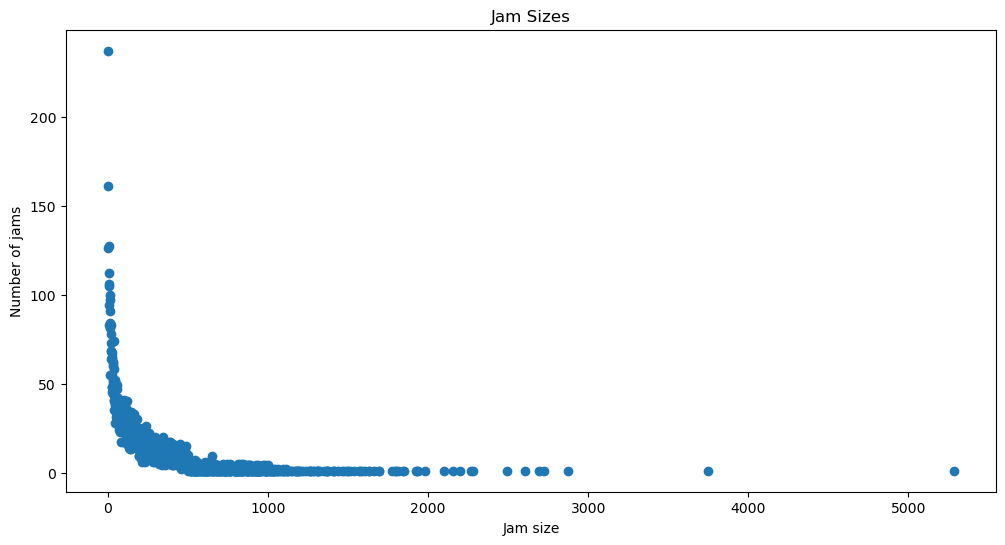

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [104]:
N=500
final_jams_counted = run_simulation(N)
lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

x_data, y_data = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.plot(x_data, y_data, 'o')
plt.show()

print(x_data)
print(y_data)
print(f"Number of elementary jam size values: {len(final_jams_counted.keys())}")

61.28305748010628 0.6392517015652691


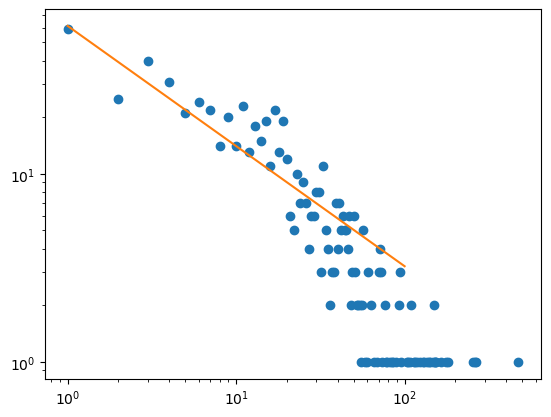

In [105]:
def func(x, a, b):
    return a * x ** -b

plt.plot(x,y,'o')

popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=[1, 0.5])
a_optimal, b_optimal = popt

print(a_optimal, b_optimal)

x_fit=np.linspace(1,10**2,1000)
y_fit = []
for value in x_fit:
    y_fit.append(func(value, a_optimal, b_optimal))

plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit,y_fit)

In [106]:
print(len(x_data))

939


In [169]:
def func_list(x, a, b):
    return [a * x_i ** -b for x_i in x]

def single_fit(x, y):
    popt1, pcov1 = scipy.optimize.curve_fit(func_list, x[0:index], y[0:index], p0=[1, 0.5])
    a1, b1 = popt1

    return a1, b1

        
def double_fit2(x, y):
    highest_b2 = 0

    for index in range(int(len(x)*0.2), int(len(x)*0.8)):
        popt1, pcov1 = scipy.optimize.curve_fit(func_list, x[0:index], y[0:index], p0=[1, 0.5])
        a1, b1 = popt1

        popt2, pcov2 = scipy.optimize.curve_fit(func_list, x[index:], y[index:], p0=[1, 0.5])
        a2, b2 = popt2

        if b2 > highest_b2:
            highest_b2 = b2

            best_a1, best_b1, best_a2, best_b2 = a1, b1, a2, b2

            optimal_index = index

    return best_a1, best_b1, best_a2, best_b2, optimal_index

def find_intersection(a1, b1, a2, b2):
    x = np.linspace(1, 10**4, 10**4)
    y1 = func_list(x, a1, b1)
    y2 = func_list(x, a2, b2)
    for index in range(len(x)):
        if y1[index] >= y2[index]:
            return x[index]
        
    return "no intersection found"

def plot_fit(x, y, a1, b1, a2, b2):
    plt.clf()
    plt.loglog(x, y, 'o', markersize=2)
    plt.xlim(0, 1.1*max(x))
    plt.ylim(0, 1.1*max(y))
    plt.loglog(x, func(x, a1, b1))
    plt.loglog(x, func(x, a2, b2))
    plt.show()
        



/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_18133/3286181697.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1.1*max(x))
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_18133/3286181697.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.1*max(y))


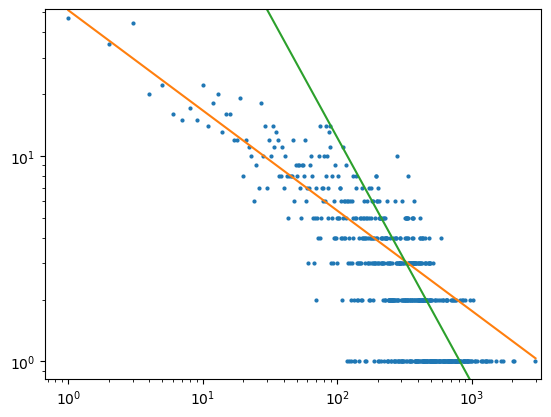

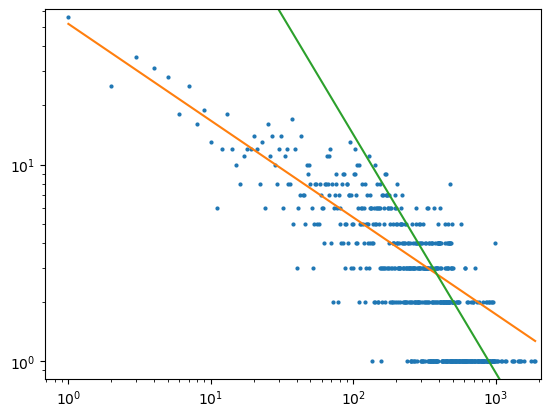

In [170]:
density_list = np.linspace(0.3, 0.7, 5)
density_list = [0.55]
n_critical_size = 2
n_simulations = 100
critical_size_dict = {}

for density in density_list:
    for _ in range(n_critical_size): 
        final_jams_counted = run_simulation(n_simulations)
        lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

        x_data, y_data = zip(*lists)
        a_optimal1, b_optimal1, a_optimal2, b_optimal2, optimal_index = double_fit2(x_data, y_data)

        critical_size = find_intersection(a_optimal1, b_optimal1, a_optimal2, b_optimal2)

        if density not in critical_size_dict:
            critical_size_dict[density] = [critical_size]
        else:
            critical_size_dict[density] += [critical_size]

        plot_fit(x_data, y_data, a_optimal1, b_optimal1, a_optimal2, b_optimal2)

        

In [168]:
print(critical_size_dict)

{0.55: [366.0, 1466.0]}
